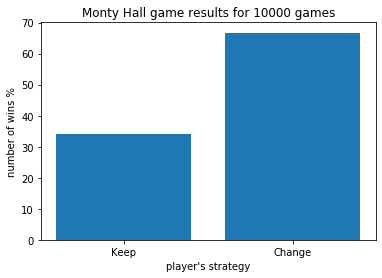

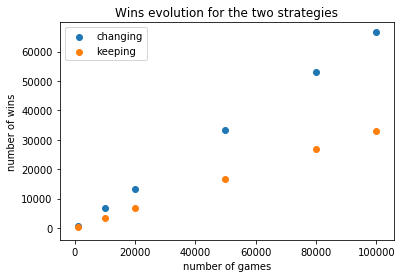

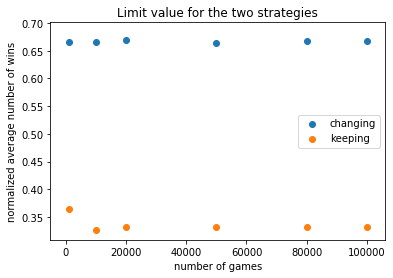

In [303]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# Monty Hall problem analyzed using Numpy Python library at its maximum potential

# NOTE: If the code takes too much time to run, try to cut the last two large samples in the last two plots:
#       samples = [1000, 10000, 20000, 50000]
# instead of
#       samples = [1000, 10000, 20000, 50000, 80000, 100000]

def Monty_Hall_with_numpy(sample): # the only parameter passed, 'sample', represents the number of games

    doors = np.array([0,0,1]) # In the model we have 3 doors: behind 0 there's a goat while behind 1 there's a car
    winning_door = np.array([]) # the empty 1D arrays are created : every element of these arrays corresponds to one game
    chosen_door = np.array([])  

    
    i=0 # loop variable initialized to 0
    while i < sample: 
        # NOTICE that this loop is used ONLY to fill the arrays. 
        # NO CALCULATION WHATSOEVER is made inside the loop !!

        np.random.shuffle(doors) # we randomly assign the position of the car and the goats
        #print(door) uncomment to see that at every iteration the doors configuration is different
        winning_door = np.append(winning_door, np.where(doors == 1))
        # the winning_door array is filled with the index containing the car (i.e the '1').
        chosen_door = np.append(chosen_door, np.random.randint(0,3))  
        # the chosen_door array is filled with the index of the door randomly chosen by the player among the values: 0,1,2 
        i += 1

    good_choice = (chosen_door == winning_door)
    # good_choice is a boolean array containing "True" when the player was lucky and chose the winning door and "False" otherwise. 
    # This calculus, made outside the loop, is made in one code line and it is really fast thanks to Numpy !

    # At this point we imagine Monty opening a door with a goat behind and asking the player if he/she wants to
    # keep his/her initial choice or if he/she changed his/her mind...

    # If he/she keeps the initial choice, the gains matrix is the good_choice matrix (remember that "True" means winning a car)
    wins_keeping = good_choice
    
   
    # Otherwise, knowning that Monty always removes a goat, we just invert the boolean matrix good_choice representing the gains matrix for changing the initial choice 
    # (if he/she chosed correctly, and he/she changes his/her mind now he/she will find a goat, and vice versa).
    wins_changing = np.invert(good_choice)
   
    return wins_keeping, wins_changing # the function returns a boolean array representing the gains 
    #for each of the two strategy, as requested by the exercise. 
        
# NOTE: mathematically, one probability is the complementary of the other (which is also the solution 
# to the Monty Hall problem, i.e. probability must conserve and the summ of all possibilities must 
# give 1 and that's why when Monty removes a goat the 2/3 probability of gain "hidden" behind the two doors the player
# did not chose, collapse in the remaining closed door - and that's why the player should always change his initial 
# choice, statistically speaking -), therefore 'wins_changing' could have been simply calculated  as 
# "1 - wins_keeping", or vice versa.


# ---------------------------
    
# We can nicely and easily show the results in a bar plot with matplotlib:

figure = plt.figure()
sample = 10000 # number of games
plt.title('Monty Hall game results for {} games'.format(sample))
plt.xlabel("player's strategy")
plt.ylabel("number of wins %")
# For each boolean gain matrix returned; i.e. 'wins_keeping' = Monty_Hall_with_numpy(sample)[0] and
# 'wins_changing' = Monty_Hall_with_numpy(sample)[1], we calculate the average using numpy .mean method
# and we multiply by 100 to express the result in percentage.
# Notice that this two commands:
#     np.sum(Monty_Hall_with_numpy(sample)[i])/sample  
#     np.mean(Monty_Hall_with_numpy(sample)[i])
# are equivalent
plot = plt.bar([1,2],[(np.mean(Monty_Hall_with_numpy(sample)[0])*100), 
                      (np.mean(Monty_Hall_with_numpy(sample)[1])*100)],tick_label=["Keep","Change"])


# We can also plot the evolution of wins for the two strategies in absolute values (i.e not in %):

wins_keeping_evolution = []
wins_changing_evolution = []
samples = [1000, 10000, 20000, 50000, 80000, 100000] # i.e. steps of played games
for tries in samples:
    wins_keeping_evolution.append(np.sum(Monty_Hall_with_numpy(tries)[0]))
    wins_changing_evolution.append(np.sum(Monty_Hall_with_numpy(tries)[1]))
    
figure = plt.figure()
plt.title('Wins evolution for the two strategies')
plt.xlabel("number of games")
plt.ylabel("number of wins")
plot = plt.scatter(samples, [x for x in wins_changing_evolution], label="changing")
plot = plt.scatter(samples, [x for x in wins_keeping_evolution], label="keeping")
legend = plt.legend()


# Finally, we can plot the average number of wins for each strategy as a function of the number of games to see the expected value (i.e. the limit of the distribution)

av_wins_keeping = []
av_wins_changing = []
for tries in samples: # we use the same samples list defined for the previous plot
    av_wins_keeping.append(np.mean(Monty_Hall_with_numpy(tries)[0]))
    av_wins_changing.append(np.mean(Monty_Hall_with_numpy(tries)[1]))

figure = plt.figure()
plt.title('Limit value for the two strategies')
plt.xlabel("number of games")
plt.ylabel("normalized average number of wins")
plot = plt.scatter(samples, [x for x in av_wins_changing], label="changing") 
plot = plt.scatter(samples, [x for x in av_wins_keeping], label="keeping")
legend = plt.legend()
